In [115]:
df = pd.read_excel('com_students_marks.xlsx')
df.head(10)import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [11]:
df = pd.read_excel('com_students_marks.xlsx')
df.head(10)

,TITLE_EN,STUD_ID,DERS_KOD,YEAR,TERM,SECTION,SON,GRADING_TYPE,QIYMET_YUZ,QIYMET_HERF,KECDI,PROG_CODE,PROG_YEAR,REF_TYPE,TRANSFER_TYPE
0,TUR 352 - Turkish Language VI (KTL),100104001,623,2012,2,NaN,1,N,100.0,A+,1.0,10104,2016,Y,LOCAL_TRANSFER
1,TUR 352 - Turkish Language VI (KTL),110103004,623,2012,2,NaN,1,N,80.0,B+,1.0,10104,2019,Y,LOCAL_TRANSFER
2,COM 314 - Computer Architectures,100104001,1240,2012,2,NaN,1,N,62.0,C,1.0,10104,2016,Y,LOCAL_TRANSFER
3,MAT 234 - Probability and Statistics II,110104001,564,2013,2,NaN,1,N,73.0,B-,1.0,10104,2016,Y,LOCAL_TRANSFER
4,COM 301 - Programming Languages I,110103004,594,2012,1,NaN,1,N,60.0,C,1.0,10104,2019,Y,LOCAL_TRANSFER
5,COM 417 - Web-Technology,90104001,643,2013,1,NaN,1,N,64.0,C,1.0,10104,2016,Y,LOCAL_TRANSFER
6,COM 417 - Web-Technology,100104001,643,2013,1,NaN,1,N,68.0,C+,1.0,10104,2016,Y,LOCAL_TRANSFER
7,COM 417 - Web-Technology,110104001,643,2013,1,NaN,1,N,80.0,B+,1.0,10104,2016,Y,LOCAL_TRANSFER
8,COM 417 - Web-Technology,110103004,643,2013,1,NaN,1,N,77.0,B,1.0,10104,2019,Y,LOCAL_TRANSFER
9,COM 417 - Human Computer Interaction (VOP),90104001,1320,2013,2,NaN,1,N,86.0,A-,1.0,10104,2016,Y,LOCAL_TRANSFER


In [133]:
mobile_dev.groupby('YEAR')['QIYMET_YUZ'].mean()

YEAR
2015    84.615385
2016    87.062500
2017    92.000000
2018    85.563636
Name: QIYMET_YUZ, dtype: float64

In [293]:
dff = pd.DataFrame({ 'Year': [2015, 2016, 2017, 2018],
    'Grades': [84.615385, 87.062500, 92.000000, 85.563636]
})

In [296]:
# The model is not suitable for several type of predictions:
x = dff['Year'].values.reshape(-1, 1)

# create an array of 'Grades'
y = dff['Grades'].values

# create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(x, y)

# create a range of values for prediction
years = np.arange(2019, 2026).reshape(-1, 1)

# use the model to make predictions
grades = model.predict(years)

# create a new dataframe with the predicted values
predictions = pd.DataFrame({'Year': years.flatten(), 'Grades': grades})

print(predictions)


   Year     Grades
0  2019  89.255944
1  2020  90.034169
2  2021  90.812394
3  2022  91.590619
4  2023  92.368845
5  2024  93.147070
6  2025  93.925295


In [297]:
# plt.plot(df['Year'], df['Grades'], 'o', label='Original Data')
# plt.plot(years, grades, 'o', label='Predicted Data')
# plt.xlabel('Year')
# plt.ylabel('Grades')
# plt.legend()
# plt.show()

## Dropping nontechnical subjects:

In [91]:
df = df[~df.TITLE_EN.isin(['CS-KG - Kyrgyz Language IV (native)', 'CS 319 - Pedagogical Internship', 'MAN 121  - Computer',
'CS 402 - Basics of Scientific reserach methods', 'CS 430 - Thesis Diploma', 'ELT 103 - Calculus-I', 'ELT 104 - Calculus-II',
'MAN 125 - Mathematics I', 'ELT 107 - Introduction to Engineering', 'ELT 102 - Physics-II', 'ELT 101 - Physics-I',
'MAN 126 - Mathematics II', 'CS 210 - Introduction to Entrepreneurship', 'ELL 105/18 - Spoken I', 'MAT 151/18 - Mathematics',
'CSK107 - Discrete Mathematicks', 'Basics of Scientific Reserach Methods'])]


In [13]:
df = df[~df['TITLE_EN'].isin(['TUR 352 - Turkish Language VI (KTL)','INT 111 - Kyrgyz Language and literature I (native)',
              'INT 109 - Physical Training I','TR 101 - Turkish Language I (OTH)',
               'ECON 202 - Macroeconomics II','CS-KG - Kyrgyz Language I (International)',
               'CS-KG - Kyrgyz Language I (native)', 'CS-TR - Turkish Language I (KTL)', 
               'CS-LF - Life Safety','CS-PHS - Physical Culture I''CS-KG - Kyrgyz Language IV (native)',
])]

In [14]:
df = df[~df['TITLE_EN'].isin([
     'CS-RU - Russian Language IV (native)','CS-TR - Turkish Language IV (KTL)', 
               'CS- KG - Kyrgyz Language II (foreigners)','CS -KG  - Kyrgyz Language II (native)',
               'CS-PHS - Physical Training II', 'CS-EN - English Language II',
               'CS-HS - History', 'CS-TR - Turkish Language OTH 2 (Prep)','CS-PHS - Physical Training III',
               'CS-TR - Turkish Language V','CS-MT - Metrology Standard  & Certification',
               'CS-TR - Turkish Language VI (OTH) prep','CS-EC - Ecology',
               'CS-KG - Kyrgyz Language & Literature - 1 (non-native)',
               'CS-KG - Kyrgyz Language & Literature - 1 (for foriegners)',
               'ELT 111 - Philosophy', 'ELT 119 - Physical Training-I',
               'KGZ 152 - Kyrgyz Language (continued KE-1)', 'B 110 - Writing','B 110 - Physical Training', 
               'MAT 422 - Life Safety','MAN 115  - English I', 'MAN 122 - Computer II',
               'TUR 251 - Turkish Language III (Students from KTL)',
               'KGZ 253 - Kyrgyz Language III (For foreigners)','HST 251 - History', 'ECO 202 - Economics',
               'COM 506 - Industrial Internship', 'A 1-D - Conversation',
               'INT 207 - Theory of State & Law',
               'INT 143 - Basic Foreign Language (Academic Reading)',
               'INT 129 - Basic Foreign Language (Turkish Language I-elective)',
               'INT 122 - Russian Language II (native)',
               'KG 101 - Kyrgyz Language I (native KG)',
               'FOR 154 - Foreign Language II (German)', 
               'MAN 151/18 - Manas Studies','ELT 117 - English Language-I', 
               'ELT 118 - Physical Training-II','ELT 109 - Manas Taanuu'

])]

In [15]:
df = df[~df.TITLE_EN.isin([
    'ELT 116 - English Language-II', 'ELT 417 - Plasma Technology',
       'CS-RU - Russian Language I (international)',
       'CS-TR - Turkish Language I (OTH)',
'CS-TR - Turkish Language IV (OTH)',
'CS-PHS - Physical Training IV',
'CS-RU - Russian Language 2 (native)',
'CS-TR - Turkish Language 2 (KTL)',
'CS-KG - Kyrgyz Language III (native)',
       'CS-TR - Turkish Language III (OTH)',
'CS-KG - Kyrgyz Language 2 (non-native)',
       'CS-RU - Russian Language 2 (non-native)',
'CS-MNS - Manas Tanuu',
'CS-TR - Turkish Language IV (OHT) prep',
       'CS-KG - Kyrgyz Language I (non-native)',
       'CS-TR - Turkish Language I (OTH) prep',
       'CS-RU - Russian Language I (non-native)',
'CS-EN - English Language 3',
'LAT 102 - Latin language',
       'Normal and clinical anatomy', 'Normal physiology',
       'MAN 109 - Turkish Language I (KTL)',
       'MAN 117 - Physical Training I', 'MAN 118 - Physical Training II',
       'MAN 106 - Russian Language II (native)', 'GRM 152 - Grammar',
'CS 320 - Pedagogical Internship',
'MAN 123  - Basis of Ecology',
       'MAN 120 - Psychology and Pedogogy',
       'INT 141 - Basic Foreign Language (Advanced English) I',
       'ELT 112 - Russian LanguageI-II (native)',
       'MAN 124 - Concepts of Natural Sciences',
       'INT 110 - Physical Training II',
       'INT 132 - Turkish Language II (KTL)',
       'INT 102 - History of International Relations II',
       'ELT 115 - Turkish Language I (KTL)',
       'ELT 128 - Psychology and Pedagogy', 'COM 102 - Terminology (COM)',
       'B 110 A2-C - Main Course',
'E 104 - Turkish Language', 'E 104 A1-D - Writing',
       'RUS 153 - Russian Language (Continued) GJ', 'A 1-D - Main Course',
       'C 110 - Conversation', 'PHT 101 - Physical Training I',
       'B 110 - Turkish Language', 'B 111 - History',
       'RUS 152 - Russian Language II (native)',
       'KGZ 152 - Kyrgyz Language II (foreigners)',
       'PHT 151/18 - Physical Training I', 'PSY 102 - Psychology',
       'PHTR 101 - Physical training',
       'Medical biology, genetics, parasitology', 'Physics-biophysics',
       'Trends in molecular medicine', 'C 110 - History',
       'CSK-03 - English Language',
       'KGZ 152 - Kyrgyz Language (ortonku RA-1)','ELL 251 - English Language I',
'PHT 251 - Physical Training III', 'ELL 252 - English Language II',
       'CNV 152 - Conversation',
'TUR 252 - Turkish Language IV (KTL)',
'COM 203 - Metrology, Standartization',
       'COM 402 - Project-Based Internship',
       'CS- RU - Russian Language I (native)',
'CS-TR - Elective( Turkish Language OTH )',
'CS 313 - Psychology and Pedagogy',
       'CS-RU - Russian Language III (international)',
       'CS-TR - Turkish Language III (KTL)',
       'CS 206 - Electrotechnics and Electronics',
       'CS-RU - Russian Language III (native)',
       'CS-KG - Kyrgyz Language IV (non-native)',
       'CS-RU - Russian Language IV (Non-native)',
       'MAN 127 - Management I', 'MAN 130 - Macroeconomics',
       'MAN 119 - Manas Tanuu', 'MNS 552 - Manas Taanuu',
       'CS-EN - English Language I',
       'CS-KG - Kyrgyz Language IV (international)',
       'CS 304 - Theory of Computation',
       'CS-RU - Russian Language 2 (international)',
       'CS-TR - Turkish Language 2 (OTH)',
       'CS- KG - Kyrgyz Language III (international)',
       'ELT 103 - Kyrgyz Language I (native)',
'CS-KG - Kyrgyz Language III (non-native)',
       'CS 310 - (elective) Introduction to Marketing',
'B 110 - Reading',
       'A 2-D - Conversation', 'INT 131 - Turkish Language I (OTH)',
       'INT 144 - Basic Foreign Language (Academic Reading II)',
       'INT 148 - Basic Foreign Language (Turkish Language II-elective)',
       'B 111 - Ecology', 'GRM  - German Language',
       'Kyrgyz language and literature',
       'KYR 102-G2 - Kyrgyz language and kyrgyz literature',
       'B 110 - Concepts of Natural Sciences', 'A 2-B - Turkish Language',
       'KGZ 153 - Kyrgyz Language (Ortonku) RA-1',
       'KGZ 153 - Kyrgyz Language ( Ortonku ) MM-2',
'PHL 252 - Philosophy', 'RUS 252 - Russian Language IV (native)',
       'PHT 202 - Physical Training IV',
'LSF 551 - Life Safety', 'COM 404 - Computer Organization II',
       'ECO 251 - Ecology', 'FOR 151 - Foreign Language (German) I',
       'PHS 251 - Philosophy', 'GER - Deutch',
'MAN 101 - Kyrgyz Language I (native)',
       'ELT 113 - Russian Language-I (native)',
'MAN 116 - English II',
       'MAN 128 - Management II',
'ELT 221 - Physical Training III',
       'ELT 210 - Thermodynamics and Optics', 'ELT 122 - Life Safety',
       'B 110 A1-C - Reading', 'A 2-E - Turkish Language',
'C 110 - Reading', 'C 110 - Grammar', 'E 104 B1-B - Main Course',
       'C 110 A2-C - Writing', 'FOR 152 - Foreign Language II (French)',
       'TUR 154 - Turkish Language II (KTL)',
       'PHT 152/18 - Physical Training II', 'ELL 103/18 - Reading I',
       'TUR 151/18 - Turkish Language I', 'ELL314 - Video Media',
'Bioetics', 'TUR 253 - Turkish Language III (other high schools)',
       'RUS 251 - Russian Language III (For native students)',
'TUR 254 - Turkish Language IV (other high schools)',
       'COM 502 - Thesis Diploma I',
       'CS-RU - Russian Language IV(international)',
       'COM 233 - Manas Taanuu', 'CS-TR - Turkish Language VI (KTL)',
       'CS 320 - Project-Based Internship',
'CS-PHL - Philosophy', 'CS 420 - Industrial Internship',
       'CS 403 - Theory of Computation',
       'INT 108 - Social and Economic Statistics',
       'INT 142 - Basic Foreign Language (Advanced English II)',
       'INT 101 - History of International Relations I',

'CS-TR - Turkish Language III (OTH) prep',
'IE 112 - Ecology/Concept of Natural Sciences',
       'ELT 114 - Turkish Language-II (KTL)', 'B 110 - Conversation',
       'C 110 - Physical Training', 'B 110 - Ecology',
'ELT 110 - Ecology',
       'E 104 - Conversation', 'B 110 - History', 'MAN 101 - Manasology',
       'Russian language', 'FOR 102-G1 - Foreign language',
       'KYR 102-G3 - Kyrgyz language and kyrgyz literature',
       'GER 153 - German Language',
'ECON 101 - Microeconomics I',
       'TUR 351 - Turkish Language V (Students from KTL)',
'COM 201 - Algorithms and Programming I',
       'KGZ 251 - Kyrgyz Language III (For native students)',
       'PSY 252 - Psychology and Pedagogy',
       'KGZ 252 - Kyrgyz Language IV (native)',
       'RU 101 - Russian language(native KG)', 'ELL 106 - Spoken II',
'MNS - Manas Taanuu','CS-EN - English Language IV', 'CS 312 - Project Management',
       'CS320 - Project based internship',
       'CS-RU - Russian Language III (non-native)',
'CS-KG - Kyrgyz Language & Literature - 2',
       'MAN 102 - Kyrgyz Language II (native)',
       'MAN 132 - Course Work (Management)',
       'INT 121 - Russian Language I (native)',
       'INT 241 - Basic Foreign Language (Critical Thinking and Debate)',
       'RUS 152 - Russian Language (continued GJ)', 'A 110 - Main Course',
       'B 1-B - Turkish Language', 'C 110 - Writing',
       'ELT 215 - Technical English III',
'E 104 - Reading',
       'MAN 301 - Marketing', 'A 2-A - Reading', 'ELL 102 - Grammar II',
       'History of Kyrgyzstan, History of medicine',
       'Histology, embriology, cytology',
       'Practice - Assistant to junior medical staff',
'FOR 151 - Foreign Language (French) I',
'RNG 152 - Reading',
       'KGZ 152 - Kyrgyz Language', 'MC 176 - Main Course',
       'MAT 321 - Philosophy', 'ECO 252 - Ecology',
       'MAN 110 - Turkish Language II (KTL)',
       'INT 146 - Basic Foreign Language (Independent study& Directed Reading-elective)',
       'INT 104 - Introduction to Economics II', 'INT 113 - Sociology',
       'INT 132 - Turkish Language II (OTH)',
'CS 419 - Industrial Internship',
'ELT 316 - Politology', 'B 1-C - Grammar',
       'E 104 - Physical Training',
       'ELL 102 - Introduction to Literature I',
'ECO 101 - Basis of Ecology', 'Chemistry',
       'KGZ 254 - Kyrgyz Language IV (foreigners)',
       'PHTR 102 - Physical training', 'RUS 102-G2 - Russian language',
'ELL 101 - Grammar I',
       'KGZ 151/18 - Kyrgyz Language and Literature I',
'RUS 102-G3 - Russian language', 'C 110 - Turkish Language',
       '206 COM - Turkish/Russian Language',
       '314 COM - Turkish / Russian Language',
       'TUR 454 - Turkish Language (Students from other high schools)',
       'CSK307 - Information Technology', 'PRP 119 - Grammar',
       'PRP 107 - Conversation (English)', 'C 110 A1-A - Main Course',
'RUS 251 - Russian Language (For native students)',
       'RUS 352 - Russian Language (For native students)',
'Microbiology and immunology',
'RUS 151 - Russian Language I (foreigners)',
       'E 104 A1-D - Grammar', 'INT 103 - Introduction to Economics I',
       'MAN 105 - Russian Language I (native)', 'SOC 101 - Sociology',
       'A 2-E - Main Course', 'B1-C - Writing',
       'General and clinical biochemistry',
       'RUS 154 - Russian Language II (foreigners)',
'Turkish Language', 'Philosophy',
'English Language',
'Physical training', 'Industrial Internship',
'Pedagogical Internship',
'Kyrgyz language and literature 2', 'Nursing care',
'Introduction to Marketing',
'Physical training 1',
'Geography of Kyrgyzstan',
'Russian Language', 'Kyrgyz language and literature 3',
'Russian language 2',
'Philosophy 1',
'Project-Based Internship',
'Physical training 2',
'Ecology',
'Russian language 1', 'Physical Education III',
'KG 103 - Manas Taanuu',
       'Thesis Diploma',
'Life safety',
       'Electrotechnics&Electronics', 'Human Computer Interaction',
       'Manas Studies', 'Physical training 4', 'History of Kyrgyzstan',
'Pathologycal physiology', 'Propedeutics of childhood diseases',
       'Internal disease ', 'Medical genetics',
       'Military medical training', 'Financial Mathematics I',
       'Practice - Nursing assistant',
       'Psychological bases of medical activity', 'Psychology',
       'Pathologycal anatomy', 'Physical Training',
       'Medical parasitology', 'General Surgery', 'Foreign language',
       'Metrology Standart & Certification',
       'Elective course - Legal aspects of medical practice',
       'Introduction to Enterpreunership', 'Emergency conditions',
       'Hygiene', 'Elective course - Trends in molecular medicine',
       'Elective course - Elective course - Psychological bases of medical activity',
       'Concepts of Natural Sciences',
       'Practice - Care for children with somatic and surgical diseases',
'Physical Education IV',
       'Propaedeutics of childhood diseases', 'Reproductive system',
'EN 101 - Business english',
       'Foreign language, Latin language', 'Physical Еducation I',
       'Basiс and clinical pharmacology', 'Manasology',
'English I', 'Microeconomics',
       'Kyrgyz Language and Literature III',
       'Kyrgyz Language and Literature I',
       'Legal aspects of medical practice', 'Russian Language II',
       'English II', 'Turkish Language 2', 'Turkish Language - 2',
       'English Language -2', 'Physical  Education II',
'Russian Language I',
'Kyrgyz Language and Literature IV',
       'Introduction to Business', 'Turkish Language II (OTH)',
       'Pediatrics 1', 'Macroeconomics', 'English Language I',
       'Critical and Creative Thinking', 'Physical Education 1',
'Tourism and Hospitality Management',
       'Elementary Turkish II', 'Public health',
'Internal disease 1',
       'Entrepreneurship',
'English Language II',
'Operative surgery and topographiс anatomy', 'Dermatology',
'Turkish Language I (OTH)',
       'Business Communication',
'HIV', 'Business Law', 'Coursework on Management',
       'Elementary Turkish I', 'Life Safety',
'Sustainable Development',
       'Principles of Management',
'Turkish Language I',
'Infant surgery',
       'Surgical disease 1', 'Pathological obstetrics',
'Basic and clinical pharmacology', 'Intermediate Turkish I',
       'Medicative massage ', 'English Language III',
       'History of Kyrgyzstan Economy ',
'Principles of Marketing', 'General surgery',
'Financial Accounting I ',
       'Coursework on Marketing ', 'Introduction to Finance',
       'Coursework on HR Management', 'Second foreign language (Chinese)',
'Enterprise Resource Planning', 'Financial Accounting II',
       'Business Ethics and Corporate Social Responsibility',
       'English Language IV', 'State Examination on Social Sciences',
       'Turkish Language - 4',
'Human Resource Management',
'Second foreign language (German)',
       'Second foreign language (French)', 'Intermediate Turkish II',
       'Financial Management', 'International Business Management',
'MAN 133 - Microeconomics',
'Design Thinking for product solutions',
'German',
       'French', 'INT 112 - Kyrgyz Language II (native)', 'Chinese',
       'Philosophy of Technologies'

])]

In [97]:
df.TITLE_EN.duplicated().sum()

14900

### Mean points of subjects for all time:

In [315]:
# For 2022 the subject did not recieve grades
# That is why we drop all elements from this subject where it is equal to 2022
df = df.drop(index = df[(df.TITLE_EN =='Engineering Computer Graphics - 2') & (df.YEAR == 2022)].index)
df[df.TITLE_EN =='Engineering Computer Graphics - 2'].tail(3)

,TITLE_EN,STUD_ID,DERS_KOD,YEAR,TERM,SECTION,SON,GRADING_TYPE,QIYMET_YUZ,QIYMET_HERF,KECDI,PROG_CODE,PROG_YEAR,REF_TYPE,TRANSFER_TYPE
24141,Engineering Computer Graphics - 2,200104092,COM 120,2021,2,1.0,1,N,0.0,F,0.0,10104,2021,C,NaN
24140,Engineering Computer Graphics - 2,200104075,COM 120,2021,2,1.0,1,N,61.0,C,1.0,10104,2020,Y,NaN
24110,Engineering Computer Graphics - 2,210104072,COM 120,2021,2,1.0,1,N,100.0,A+,1.0,10104,2021,C,NaN


In [312]:
dff = df[df.YEAR >= 2015]
grouped_subjects = dff.groupby('TITLE_EN')['QIYMET_YUZ'].mean()
grouped_subjects = grouped_subjects.sort_values(ascending= False)
grouped_subjects.head(50)

# 95 - 100	A+	4	Excellent
# 90 - 94	A	3.75
# 85 - 89	A-	3.5
# 80 - 84	B+	3.25	Good
# 75 - 79	B	3
# 70 - 74	B-	2.75

TITLE_EN
COM 407 - Computer Networks and Telecommunications I            100.000000
Mathematics II                                                  100.000000
Mathematical Logic and Algorithm Theory                         100.000000
Physics                                                          96.000000
COM 411 - Computer Organization I                                95.000000
COM 227 - Data Structures                                        90.000000
CS 406 - Robotics                                                88.941176
ELT 212 - Linear Algebra                                         88.000000
Statistics I                                                     88.000000
Discrete Mathematics II                                          86.000000
CS 402 - Mobile App Development                                  85.848837
CS 407 - Machine Learning                                        85.500000
COM 454 - Object Oriented Programming II                         85.000000
COM 431 - Object

### Visualization for Microprocessors and Microcomputing (from 2014 to 2016)


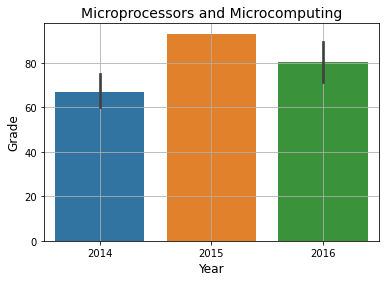

In [285]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 407 - Microprocessors and Microcomputing'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
#df[df.TITLE_EN == 'CS 407 - Microprocessors and Microcomputing'].groupby('YEAR')['QIYMET_YUZ'].mean()

plt.title('Microprocessors and Microcomputing', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
ax.grid(True)

### Visualization for Computer Networks and Telecommunication (from 2014 to 2018)

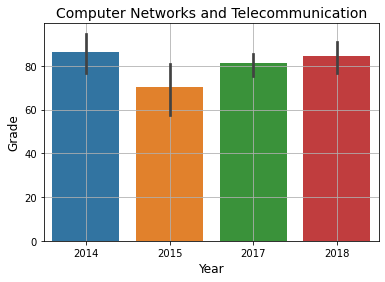

In [286]:
# sns.lineplot(data = df[df.TITLE_EN == 'CS 311 - Computer Networks and Telecommunication'], 
#              x = 'YEAR', y = 'QIYMET_YUZ')

ax = sns.barplot(data = df[df.TITLE_EN == 'CS 311 - Computer Networks and Telecommunication'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
df[df.TITLE_EN == 'CS 311 - Computer Networks and Telecommunication'].groupby('YEAR')['QIYMET_YUZ'].mean()
plt.title('Computer Networks and Telecommunication', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
ax.grid(True)



### CS 308 - Computer Organization & Architecture (from 2014 to 2018)

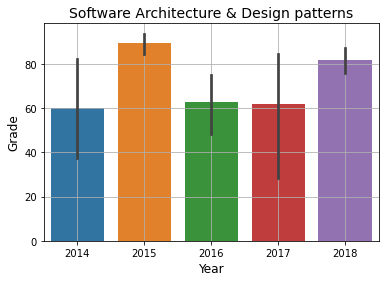

<Figure size 720x576 with 0 Axes>

In [242]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 308 - Computer Organization & Architecture'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Software Architecture & Design patterns', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### CS 405 - Computer Graphics (2013 and 2016)

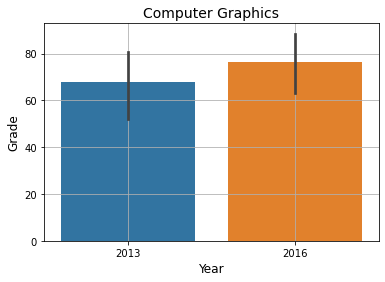

<Figure size 720x576 with 0 Axes>

In [243]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 405 - Computer Graphics'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Computer Graphics', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### Machine Learning (from 2021)

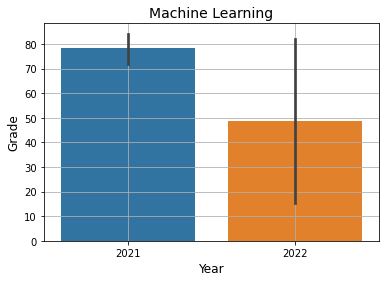

<Figure size 720x576 with 0 Axes>

In [244]:
ax = sns.barplot(data = df[df.TITLE_EN == 'Machine Learning'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Machine Learning', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### CS 209 - Engineering Computer Graphics (from 2014 to 2018)

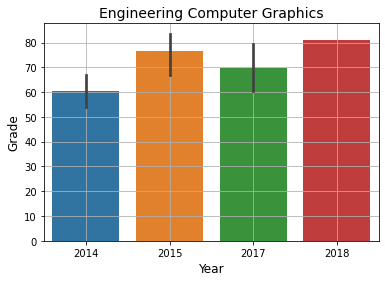

<Figure size 720x576 with 0 Axes>

In [246]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 209 - Engineering Computer Graphics'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Engineering Computer Graphics', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### CS 306 - Software Engineering II (from 2015 to 2018)

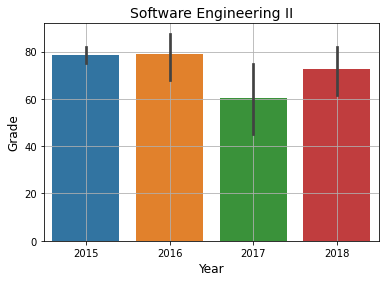

<Figure size 720x576 with 0 Axes>

In [247]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 306 - Software Engineering II'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Software Engineering II', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### CS 409 - Network Technologies (2015, 2016)

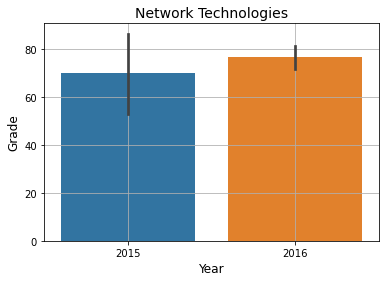

<Figure size 720x576 with 0 Axes>

In [249]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 409 - Network Technologies'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Network Technologies', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

In [311]:
df = df.drop(index = df[(df.TITLE_EN =='Engineering Computer Graphics - 2') & (df.YEAR == 2022)].index)
df[df.TITLE_EN =='Engineering Computer Graphics - 2']

,TITLE_EN,STUD_ID,DERS_KOD,YEAR,TERM,SECTION,SON,GRADING_TYPE,QIYMET_YUZ,QIYMET_HERF,KECDI,PROG_CODE,PROG_YEAR,REF_TYPE,TRANSFER_TYPE
24166,Engineering Computer Graphics - 2,210104092,COM 120,2021,2,1.0,1,N,99.0,A+,1.0,10104,2021,C,NaN
24164,Engineering Computer Graphics - 2,210104101,COM 120,2021,2,1.0,1,N,0.0,F,0.0,10104,2021,C,NaN
24173,Engineering Computer Graphics - 2,180104004,COM 120,2021,2,1.0,1,N,50.0,D,1.0,10104,2018,Y,NaN
24168,Engineering Computer Graphics - 2,180104005,COM 120,2021,2,1.0,1,N,0.0,F,0.0,10104,2018,Y,NaN
24170,Engineering Computer Graphics - 2,200104084,COM 120,2021,2,1.0,1,N,89.0,A-,1.0,10104,2021,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24108,Engineering Computer Graphics - 2,210104065,COM 120,2021,2,1.0,1,N,76.0,B,1.0,10104,2021,C,NaN
24142,Engineering Computer Graphics - 2,200104101,COM 120,2021,2,1.0,1,N,94.0,A,1.0,10104,2021,C,NaN
24141,Engineering Computer Graphics - 2,200104092,COM 120,2021,2,1.0,1,N,0.0,F,0.0,10104,2021,C,NaN
24140,Engineering Computer Graphics - 2,200104075,COM 120,2021,2,1.0,1,N,61.0,C,1.0,10104,2020,Y,NaN


### Engineering Computer Graphics - 2 (2021)

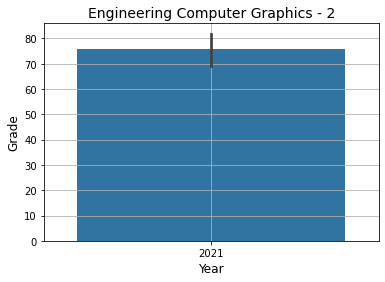

<Figure size 720x576 with 0 Axes>

In [313]:

ax = sns.barplot(data = df[df.TITLE_EN =='Engineering Computer Graphics - 2'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Engineering Computer Graphics - 2', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### Designing in C# (2022)

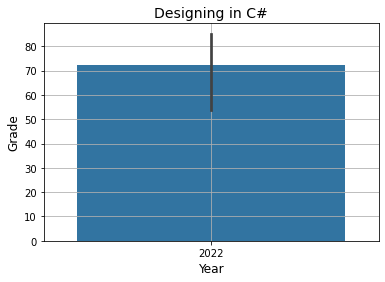

<Figure size 720x576 with 0 Axes>

In [256]:
ax = sns.barplot(data = df[df.TITLE_EN == 'Designing in C# '], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Designing in C#', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### CS 305 - Software Engineering I (from 2014 to 2018)

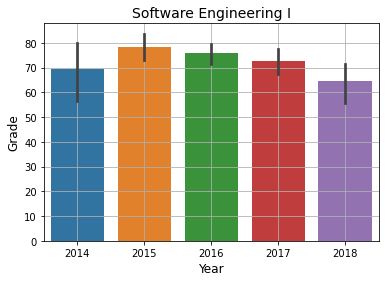

<Figure size 720x576 with 0 Axes>

In [258]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 305 - Software Engineering I'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Software Engineering I', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

### Information Security (from 2019 to 2022)

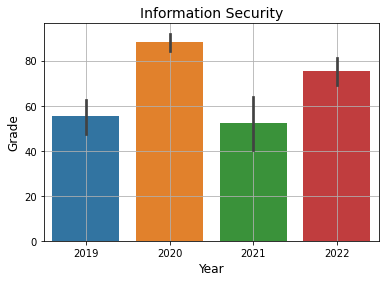

<Figure size 720x576 with 0 Axes>

In [259]:
ax = sns.barplot(data = df[df.TITLE_EN == 'Information Security'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Information Security', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

In [270]:
df.TITLE_EN.unique()

array(['COM 205 - Mathematical Logic and Algorithm Theory',
       'MAT 254 - Discrete Structures', 'PHS 201 - Physics I',
       'MAT 253 - Numerical Analysis', 'MAT 231 - Calculus I',
       'MAT 203 - Linear Algebra I', 'PHS 202 - Physics II',
       'MAT 232 - Calculus II', 'COM 301 - Programming Languages I',
       'COM 202 - Algorithms and Programming II',
       'MAT 233 - Probability and Statistics I',
       'MAT 234 - Probability and Statistics II',
       'COM 302 - Programming Languages II',
       'ELT 331 - Electric Circuits and Electronics',
       'COM 303 - Computer Graphics', 'CS-PHS - Physical Culture I',
       'COM 118 - Algorithms and Programming II',
       'COM 312 - Assembler Programming',
       'COM 310 - Software Engineering I', 'CS 106 - Physics II',
       'COM 316 - Functional and Log. Programming',
       'CS 108 - Math. Logic and Algorithm Theory',
       'COM 306 - Microprocessors', 'CS 104 - Calculus II',
       'COM 303 - Data Structures I', 'COM 31

In [253]:

df[df.TITLE_EN == 'Engineering Computer Graphics - 2']
# df[df.STUD_ID == 120104036]

#Subjects with high perfomance:
# CS 402 - Mobile App Development (from 2015 to 2018)
# CS 407 - Microprocessors and Microcomputing (from 2014 to 2016)
# CS 311 - Computer Networks and Telecommunication (from 2014 to 2018)
# CS 405 - Software Architecture & Design patterns (only for 2016)
# CS 308 - Computer Organization & Architecture (from 2014 to 2014)
# CS 405 - Computer Graphics (2013 and 2016)
# Machine Learning (from 2021)
# CS 209 - Engineering Computer Graphics (from 2014 to 2018)
# CS 306 - Software Engineering II (from 2015 to 2018)
# CS 409 - Network Technologies (2015, 2016)
# Engineering Computer Graphics - 2 (2021, 2022)
# Designing in C# (2022)
# CS 305 - Software Engineering I (from 2014 to 2018)
# Information Security (from 2019 to 2022)


,TITLE_EN,STUD_ID,DERS_KOD,YEAR,TERM,SECTION,SON,GRADING_TYPE,QIYMET_YUZ,QIYMET_HERF,KECDI,PROG_CODE,PROG_YEAR,REF_TYPE,TRANSFER_TYPE
24173,Engineering Computer Graphics - 2,180104004,COM 120,2021,2,1.0,1,N,50.0,D,1.0,10104,2018,Y,NaN
24166,Engineering Computer Graphics - 2,210104092,COM 120,2021,2,1.0,1,N,99.0,A+,1.0,10104,2021,C,NaN
24164,Engineering Computer Graphics - 2,210104101,COM 120,2021,2,1.0,1,N,0.0,F,0.0,10104,2021,C,NaN
24074,Engineering Computer Graphics - 2,210104091,COM 120,2021,2,1.0,1,N,96.0,A+,1.0,10104,2021,C,NaN
24100,Engineering Computer Graphics - 2,210104042,COM 120,2021,2,1.0,1,N,98.0,A+,1.0,10104,2021,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26423,Engineering Computer Graphics - 2,190104023,COM 120,2022,2,1.0,1,N,0.0,IP,NaN,10104,2019,C,NaN
26424,Engineering Computer Graphics - 2,190104053,COM 120,2022,2,1.0,1,N,0.0,IP,NaN,10104,2019,C,NaN
26421,Engineering Computer Graphics - 2,190104022,COM 120,2022,2,1.0,1,N,0.0,IP,NaN,10104,2019,C,NaN
26422,Engineering Computer Graphics - 2,180401006,COM 120,2022,2,1.0,1,N,0.0,IP,NaN,10104,2021,C,NaN


#### Analyzing CS 402 - Mobile App Development subject:

In [299]:
mobile_dev = df[df.TITLE_EN == 'CS 402 - Mobile App Development']
mobile_dev.head()

,TITLE_EN,STUD_ID,DERS_KOD,YEAR,TERM,SECTION,SON,GRADING_TYPE,QIYMET_YUZ,QIYMET_HERF,KECDI,PROG_CODE,PROG_YEAR,REF_TYPE,TRANSFER_TYPE
28851,CS 402 - Mobile App Development,130104008,4806,2015,2,NaN,1,N,100.0,A+,1.0,10104,2016,Y,LOCAL_TRANSFER
28852,CS 402 - Mobile App Development,140104052,4806,2015,2,NaN,1,N,51.0,D,1.0,10104,2016,Y,LOCAL_TRANSFER
28841,CS 402 - Mobile App Development,120104029,4806,2015,2,NaN,1,N,74.0,B-,1.0,10104,2016,Y,LOCAL_TRANSFER
28840,CS 402 - Mobile App Development,120104027,4806,2015,2,NaN,1,N,60.0,C,1.0,10104,2016,Y,LOCAL_TRANSFER
28850,CS 402 - Mobile App Development,130104016,4806,2015,2,NaN,1,N,100.0,A+,1.0,10104,2016,Y,LOCAL_TRANSFER


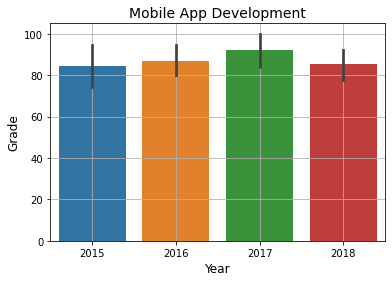

<Figure size 720x576 with 0 Axes>

In [284]:
ax = sns.barplot(data = df[df.TITLE_EN == 'CS 402 - Mobile App Development'], 
             x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Mobile App Development', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Grade', fontsize = 12)
plt.figure(figsize=(10, 8))
ax.grid(True)

## Overall students perfomance by year

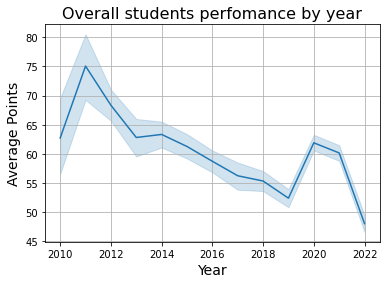

<Figure size 432x288 with 0 Axes>

In [282]:
df = df.sort_values('YEAR', ascending = True)

ax = sns.lineplot(data = df, x = 'YEAR', y = 'QIYMET_YUZ')
plt.title('Overall students perfomance by year', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Points', fontsize = 14)

plt.figure(figsize=(6, 4))
ax.grid(True)

In [281]:
df.TITLE_EN.unique()

array(['COM 205 - Mathematical Logic and Algorithm Theory',
       'MAT 254 - Discrete Structures', 'PHS 201 - Physics I',
       'MAT 253 - Numerical Analysis', 'MAT 231 - Calculus I',
       'MAT 203 - Linear Algebra I', 'PHS 202 - Physics II',
       'MAT 232 - Calculus II',
       'ELT 331 - Electric Circuits and Electronics',
       'MAT 234 - Probability and Statistics II',
       'COM 302 - Programming Languages II',
       'MAT 233 - Probability and Statistics I',
       'COM 202 - Algorithms and Programming II',
       'COM 301 - Programming Languages I', 'COM 303 - Computer Graphics',
       'CS 103 - Calculus I', 'COM 117 - Algorithms and Programming I',
       'COM 118 - Algorithms and Programming II', 'CS 105 - Physics I',
       'CS-PHS - Physical Culture I',
       'CS 108 - Math. Logic and Algorithm Theory',
       'COM 301 - Engineering Computer Graphics',
       'COM 407 - Computer Networks and Telecommunications I',
       'COM 411 - Computer Organization I', 'CS 106

In [288]:
# Average grades of all technical subjects for 2019
df[df['YEAR'] == 2019].groupby('YEAR')['QIYMET_YUZ'].mean() 

YEAR
2019    52.388557
Name: QIYMET_YUZ, dtype: float64

In [54]:
mobile_dev.groupby('YEAR')['QIYMET_YUZ'].mean()

YEAR
2015    84.615385
2016    87.062500
2017    92.000000
2018    85.563636
Name: QIYMET_YUZ, dtype: float64

### Visualization for  mobile app development subject

<AxesSubplot:xlabel='YEAR', ylabel='QIYMET_YUZ'>

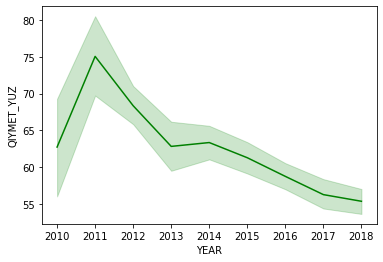

In [112]:
df_2018 = df[df.YEAR <= 2018]
sns.lineplot(data = df_2018, x = 'YEAR', y = 'QIYMET_YUZ', color = 'green')

<AxesSubplot:xlabel='YEAR', ylabel='QIYMET_YUZ'>

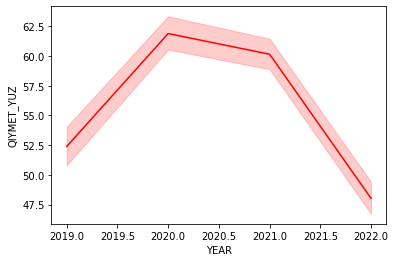

In [289]:
# Perfomance growing after covid-19
df_2022 = df[df.YEAR > 2018]
sns.lineplot(data = df_2022, x = 'YEAR', y = 'QIYMET_YUZ', color = 'red')

In [62]:
# mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
# print(r2_score(y, mymodel(x)))

0.0023635496232289332


In [63]:
# x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
# y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
# print(r2_score(y, mymodel(x)))

0.9432150416451026
